In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
os.chdir('..')

## 1. Import functions from custom library
We import the functions `import_data` and `simulate_multiple_durations` from the custom library

In [2]:
from src.data import import_data
from src.simulations import simulate_multiple_durations
from src.plot import show_results

## 2. Import/upload data and pre-processing
We import the historical time-series of gold from https://datahub.io/core/gold-prices. Those data are from 1950 to 2018. 
Those data are collected monthly while the data from Yahoo finance are collecated daily.

Then we import the data from Yahoo finance and we concatenate the two datasets.

### Manual upload of data

In [3]:
df1 = pd.read_csv('data/monthly-gold.csv')

df1.index = pd.to_datetime(df1['Date'])
df1.drop('Date', axis=1, inplace=True)

df1.columns = ['Close']

df1

,Close
Date,
1950-01-01,34.730
1950-02-01,34.730
1950-03-01,34.730
1950-04-01,34.730
1950-05-01,34.730
...,...
2018-05-01,1303.618
2018-06-01,1282.126
2018-07-01,1238.064


### Import data from Yahoo finance

In [4]:
df2 = import_data('GC=F', starting_date='2000-09-02')
df2.columns = ['Data from yfinance']

df_combined = df1.join(df2)

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


[*********************100%%**********************]  1 of 1 completed


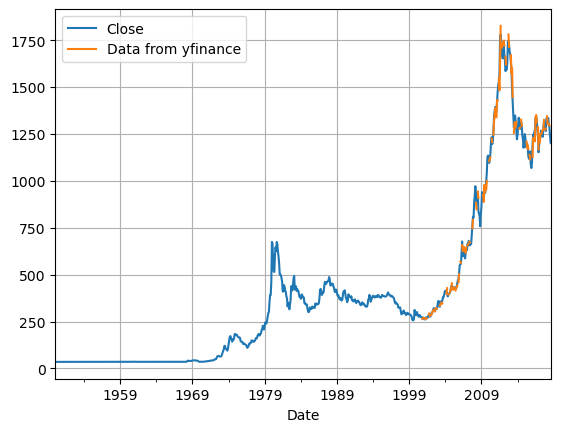

In [5]:
df_combined.plot()
plt.grid()
plt.show()

### Concatenate daily historical data with Yahoo finance data

In [6]:
# transform df1 into dailty using a linear fit

# for each there are on average 21 trading days
number_total_days = len(df1)*21

daily_data1 = np.zeros(number_total_days)

for i in range(len(df1)-1):
    initial_month_price = df1['Close'].iloc[i]
    final_month_price = df1['Close'].iloc[i+1]

    # linear fit for daily prices
    daily_prices = np.linspace(initial_month_price, final_month_price, 21)

    daily_data1[21*i:21*(i+1)] = daily_prices

#remove 0 from the price list
daily_data1 = daily_data1[daily_data1 != 0]

assert all(daily_data1 != 0), "The price of gold cannot be equal to 0"

In [7]:
daily_data2 = np.array(df2.loc[df2.index > '2018-09-02'].iloc[:, 0])

daily_data = np.concatenate([daily_data1, daily_data2])

# convert it into a Pandas DataFrame before running the simulations
daily_data = pd.DataFrame(daily_data, columns=['Close'])

## 3. Simulate different investments
We simulate different PAC having:
- duration between 1 and 30 years at intervals of 1 year
- 1000 simulations per each duration

In the results are contained (per each duration):
- 1st column, the minimum net return
- 2nd column, the maximum net return
- 3rd column, the median net return
- 4th column, the probability of having a positive return
- 5th column, the probability of having a positive return accounting for the inflation

In [8]:
years_grid = np.arange(5, 30.1, 1)

results = simulate_multiple_durations(data = daily_data,
                                      years_grid = years_grid,
                                      n_simulations = 1000)

100%|███████████████████████████████████████████| 26/26 [02:02<00:00,  4.69s/it]


In [9]:
print('Shape of results', results.shape)
print(results.shape[0], 'denotes the number of periods considered in the simulations.')
print(results.shape[1], 'denotes the total number of information for each period.')

Shape of results (26, 5)
26 denotes the number of periods considered in the simulations.
5 denotes the total number of information for each period.


## 4. Show results
We show the results of the simulation and we save the figure in the folder `results` with the name `QuickStart.png`.

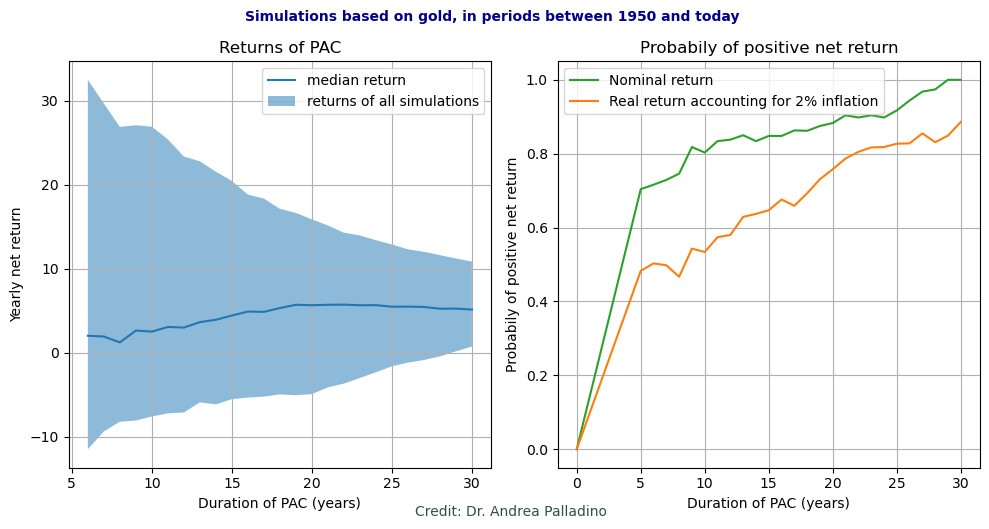

In [10]:
show_results(years_grid,
             results, 
             title="Simulations based on gold, in periods between 1950 and today",
             save_figure = "results/gold.png")